<a href="https://colab.research.google.com/github/Jameslorry6666/Micheal.iml/blob/master/Research__DEMENTIA_XAI_Anomalies.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

In [2]:
import warnings
warnings.filterwarnings('ignore')

In [3]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [4]:
#Read and view the data set
df = pd.read_csv('/content/gdrive/MyDrive/Datasets/df_drop.csv')
df.head()

,Subject ID,MRI ID,Group,Visit,MR Delay,M/F,Hand,Age,EDUC,SES,MMSE,CDR,eTIV,nWBV,ASF
0,OAS2_0001,OAS2_0001_MR1,Nondemented,1,0,M,R,87,14,2.0,27.0,0.0,1987,0.696,0.883
1,OAS2_0001,OAS2_0001_MR2,Nondemented,2,457,M,R,88,14,2.0,30.0,0.0,2004,0.681,0.876
2,OAS2_0004,OAS2_0004_MR1,Nondemented,1,0,F,R,88,18,3.0,28.0,0.0,1215,0.710,1.444
3,OAS2_0004,OAS2_0004_MR2,Nondemented,2,538,F,R,90,18,3.0,27.0,0.0,1200,0.718,1.462
4,OAS2_0005,OAS2_0005_MR1,Nondemented,1,0,M,R,80,12,4.0,28.0,0.0,1689,0.712,1.039


In [5]:
df.head(354)

,Subject ID,MRI ID,Group,Visit,MR Delay,M/F,Hand,Age,EDUC,SES,MMSE,CDR,eTIV,nWBV,ASF
0,OAS2_0001,OAS2_0001_MR1,Nondemented,1,0,M,R,87,14,2.0,27.0,0.0,1987,0.696,0.883
1,OAS2_0001,OAS2_0001_MR2,Nondemented,2,457,M,R,88,14,2.0,30.0,0.0,2004,0.681,0.876
2,OAS2_0004,OAS2_0004_MR1,Nondemented,1,0,F,R,88,18,3.0,28.0,0.0,1215,0.710,1.444
3,OAS2_0004,OAS2_0004_MR2,Nondemented,2,538,F,R,90,18,3.0,27.0,0.0,1200,0.718,1.462
4,OAS2_0005,OAS2_0005_MR1,Nondemented,1,0,M,R,80,12,4.0,28.0,0.0,1689,0.712,1.039
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
349,OAS2_0185,OAS2_0185_MR2,Demented,2,842,M,R,82,16,1.0,28.0,0.5,1693,0.694,1.037
350,OAS2_0185,OAS2_0185_MR3,Demented,3,2297,M,R,86,16,1.0,26.0,0.5,1688,0.675,1.040
351,OAS2_0186,OAS2_0186_MR1,Nondemented,1,0,F,R,61,13,2.0,30.0,0.0,1319,0.801,1.331
352,OAS2_0186,OAS2_0186_MR2,Nondemented,2,763,F,R,63,13,2.0,30.0,0.0,1327,0.796,1.323


In [6]:
df.describe()

,Visit,MR Delay,Age,EDUC,SES,MMSE,CDR,eTIV,nWBV,ASF
count,354.000000,354.000000,354.000000,354.000000,354.000000,354.000000,354.000000,354.000000,354.000000,354.000000
mean,1.884181,601.353107,77.033898,14.703390,2.460452,27.409605,0.271186,1489.991525,0.729879,1.193780
std,0.925330,640.596081,7.811808,2.895662,1.134005,3.712626,0.370537,175.768462,0.037842,0.136821
min,1.000000,0.000000,60.000000,6.000000,1.000000,4.000000,0.000000,1106.000000,0.644000,0.876000
25%,1.000000,0.000000,71.000000,12.000000,2.000000,27.000000,0.000000,1358.250000,0.699000,1.100250
50%,2.000000,559.500000,77.000000,15.000000,2.000000,29.000000,0.000000,1470.500000,0.729000,1.193500
75%,2.000000,882.500000,82.000000,16.750000,3.000000,30.000000,0.500000,1595.250000,0.757000,1.292500
max,5.000000,2639.000000,98.000000,23.000000,5.000000,30.000000,2.000000,2004.000000,0.837000,1.587000


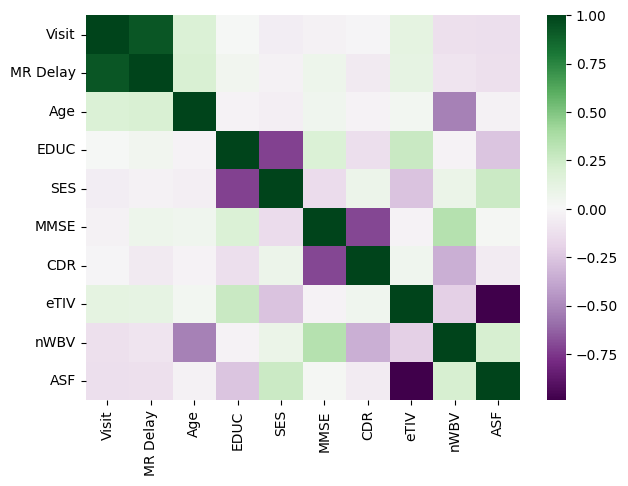

In [7]:
plt.figure(figsize=(7,5))
sns.heatmap(df.corr(),cmap='PRGn')
plt.show()

In [8]:
X = df.drop(['CDR', 'Subject ID', 'MRI ID' ], axis=1)
y = df['CDR']

In [9]:
X

,Group,Visit,MR Delay,M/F,Hand,Age,EDUC,SES,MMSE,eTIV,nWBV,ASF
0,Nondemented,1,0,M,R,87,14,2.0,27.0,1987,0.696,0.883
1,Nondemented,2,457,M,R,88,14,2.0,30.0,2004,0.681,0.876
2,Nondemented,1,0,F,R,88,18,3.0,28.0,1215,0.710,1.444
3,Nondemented,2,538,F,R,90,18,3.0,27.0,1200,0.718,1.462
4,Nondemented,1,0,M,R,80,12,4.0,28.0,1689,0.712,1.039
...,...,...,...,...,...,...,...,...,...,...,...,...
349,Demented,2,842,M,R,82,16,1.0,28.0,1693,0.694,1.037
350,Demented,3,2297,M,R,86,16,1.0,26.0,1688,0.675,1.040
351,Nondemented,1,0,F,R,61,13,2.0,30.0,1319,0.801,1.331
352,Nondemented,2,763,F,R,63,13,2.0,30.0,1327,0.796,1.323


In [10]:
y

0      0.0
1      0.0
2      0.0
3      0.0
4      0.0
      ... 
349    0.5
350    0.5
351    0.0
352    0.0
353    0.0
Name: CDR, Length: 354, dtype: float64

In [11]:
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

In [12]:
X

,Group,Visit,MR Delay,M/F,Hand,Age,EDUC,SES,MMSE,eTIV,nWBV,ASF
0,Nondemented,1,0,M,R,87,14,2.0,27.0,1987,0.696,0.883
1,Nondemented,2,457,M,R,88,14,2.0,30.0,2004,0.681,0.876
2,Nondemented,1,0,F,R,88,18,3.0,28.0,1215,0.710,1.444
3,Nondemented,2,538,F,R,90,18,3.0,27.0,1200,0.718,1.462
4,Nondemented,1,0,M,R,80,12,4.0,28.0,1689,0.712,1.039
...,...,...,...,...,...,...,...,...,...,...,...,...
349,Demented,2,842,M,R,82,16,1.0,28.0,1693,0.694,1.037
350,Demented,3,2297,M,R,86,16,1.0,26.0,1688,0.675,1.040
351,Nondemented,1,0,F,R,61,13,2.0,30.0,1319,0.801,1.331
352,Nondemented,2,763,F,R,63,13,2.0,30.0,1327,0.796,1.323


In [13]:
X['Hand'].value_counts()

R    354
Name: Hand, dtype: int64

In [14]:
X['M/F'].value_counts()

F    204
M    150
Name: M/F, dtype: int64

In [15]:
X['Group'].value_counts()

Nondemented    190
Demented       127
Converted       37
Name: Group, dtype: int64

In [16]:
# changing the values or substitution (converting float to string)
dictionary={'M':0, 'F':1}
X['GENDER']= X['M/F'].map(dictionary)

In [17]:
dictionary = {'Demented':1, 'Nondemented':0,'Converted':1 }
X['Targets']= X['Group'].map(dictionary)
X.head()

,Group,Visit,MR Delay,M/F,Hand,Age,EDUC,SES,MMSE,eTIV,nWBV,ASF,GENDER,Targets
0,Nondemented,1,0,M,R,87,14,2.0,27.0,1987,0.696,0.883,0,0
1,Nondemented,2,457,M,R,88,14,2.0,30.0,2004,0.681,0.876,0,0
2,Nondemented,1,0,F,R,88,18,3.0,28.0,1215,0.710,1.444,1,0
3,Nondemented,2,538,F,R,90,18,3.0,27.0,1200,0.718,1.462,1,0
4,Nondemented,1,0,M,R,80,12,4.0,28.0,1689,0.712,1.039,0,0


In [18]:
new_df = X[['Visit', 'MR Delay','Age','EDUC','SES','MMSE','eTIV','nWBV','ASF','GENDER','Targets']]
new_df.head()

,Visit,MR Delay,Age,EDUC,SES,MMSE,eTIV,nWBV,ASF,GENDER,Targets
0,1,0,87,14,2.0,27.0,1987,0.696,0.883,0,0
1,2,457,88,14,2.0,30.0,2004,0.681,0.876,0,0
2,1,0,88,18,3.0,28.0,1215,0.710,1.444,1,0
3,2,538,90,18,3.0,27.0,1200,0.718,1.462,1,0
4,1,0,80,12,4.0,28.0,1689,0.712,1.039,0,0


In [19]:
X = new_df.drop(['MR Delay','Targets'], axis=1)
y = new_df['Targets']

In [20]:
new_df.head()

,Visit,MR Delay,Age,EDUC,SES,MMSE,eTIV,nWBV,ASF,GENDER,Targets
0,1,0,87,14,2.0,27.0,1987,0.696,0.883,0,0
1,2,457,88,14,2.0,30.0,2004,0.681,0.876,0,0
2,1,0,88,18,3.0,28.0,1215,0.710,1.444,1,0
3,2,538,90,18,3.0,27.0,1200,0.718,1.462,1,0
4,1,0,80,12,4.0,28.0,1689,0.712,1.039,0,0


In [21]:
#converting the string variable to float
#categorical_features = ["Group", "M/F", "Hand"]
#one_hot = OneHotEncoder()
#transformer = ColumnTransformer([("one_hot",
                                   #one_hot,
                                   #categorical_features)],
                                   #remainder="passthrough")
#transformed_X = transformer.fit_transform(X)
#transformed_X

In [22]:
#visualizing transformed_X dataset
#pd.DataFrame(transformed_X)

In [23]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 0)
print(f'Train : {X_train.shape}, Test : {X_test.shape}')

Train : (247, 9), Test : (107, 9)


In [24]:
type(X_train)

pandas.core.frame.DataFrame

In [25]:
from sklearn.ensemble import RandomForestClassifier
rf_model = RandomForestClassifier(n_estimators=10,random_state=1)
rf_model.fit(X_train, y_train)

RandomForestClassifier(n_estimators=10, random_state=1)

In [26]:
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.metrics import classification_report
y_pred = rf_model.predict(X_test)
print(classification_report(y_true = y_test, y_pred = y_pred))
#print(f'R2 = {r2_score(y_test, y_pred):.2f}')
#print(f'MSE = {mean_squared_error(y_test, y_pred):.2f}')

              precision    recall  f1-score   support

           0       0.77      0.88      0.82        56
           1       0.84      0.71      0.77        51

    accuracy                           0.79       107
   macro avg       0.80      0.79      0.79       107
weighted avg       0.80      0.79      0.79       107



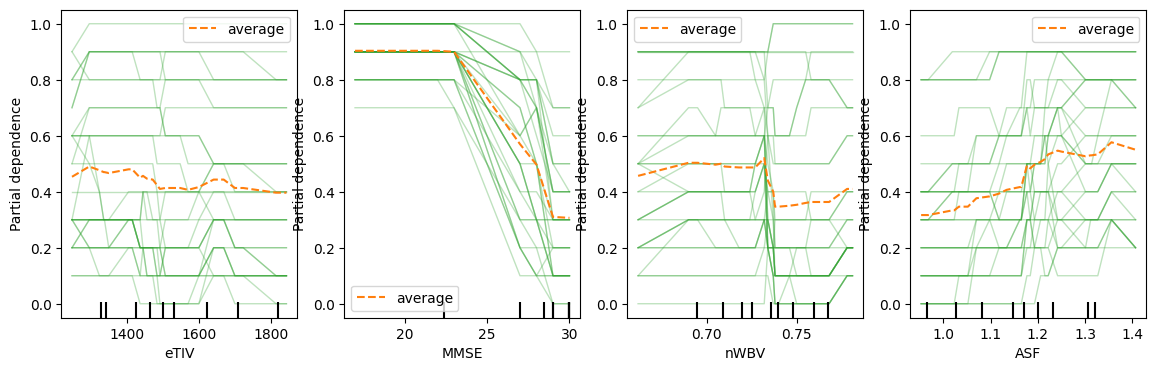

In [27]:
from sklearn.inspection import PartialDependenceDisplay
features = ['eTIV', 'MMSE', 'nWBV', 'ASF']
fig, ax = plt.subplots(ncols=4, figsize=(14,4))
display = PartialDependenceDisplay.from_estimator(rf_model, X_test.iloc[:30,:],
                                                  features, kind = 'both', random_state=0,
                                                  ice_lines_kw = {'color':'tab:green', 'linewidth':1},
                                                  pd_line_kw = {'color':'tab:orange', 'linestyle':'--'}, ax = ax)

In [28]:
values = df['eTIV'].unique()

In [29]:
values.sort()
values

array([1106, 1123, 1143, 1151, 1154, 1165, 1174, 1179, 1191, 1194, 1200,
       1202, 1212, 1215, 1225, 1230, 1236, 1238, 1243, 1247, 1250, 1256,
       1257, 1264, 1271, 1272, 1273, 1274, 1275, 1277, 1281, 1284, 1287,
       1289, 1290, 1293, 1295, 1298, 1307, 1308, 1310, 1311, 1313, 1314,
       1315, 1316, 1317, 1319, 1320, 1322, 1323, 1324, 1327, 1329, 1331,
       1332, 1333, 1334, 1335, 1336, 1337, 1338, 1339, 1340, 1342, 1343,
       1344, 1345, 1346, 1348, 1349, 1351, 1353, 1354, 1357, 1358, 1359,
       1360, 1361, 1362, 1365, 1370, 1371, 1377, 1378, 1379, 1380, 1381,
       1383, 1390, 1391, 1392, 1393, 1396, 1398, 1400, 1401, 1402, 1404,
       1406, 1407, 1408, 1409, 1412, 1414, 1416, 1419, 1420, 1423, 1425,
       1426, 1428, 1430, 1432, 1433, 1436, 1438, 1440, 1442, 1444, 1445,
       1446, 1447, 1449, 1450, 1451, 1453, 1454, 1455, 1456, 1457, 1459,
       1460, 1461, 1462, 1463, 1464, 1465, 1466, 1470, 1471, 1474, 1475,
       1476, 1477, 1478, 1479, 1480, 1482, 1483, 14

In [30]:
X.columns

Index(['Visit', 'Age', 'EDUC', 'SES', 'MMSE', 'eTIV', 'nWBV', 'ASF', 'GENDER'], dtype='object')

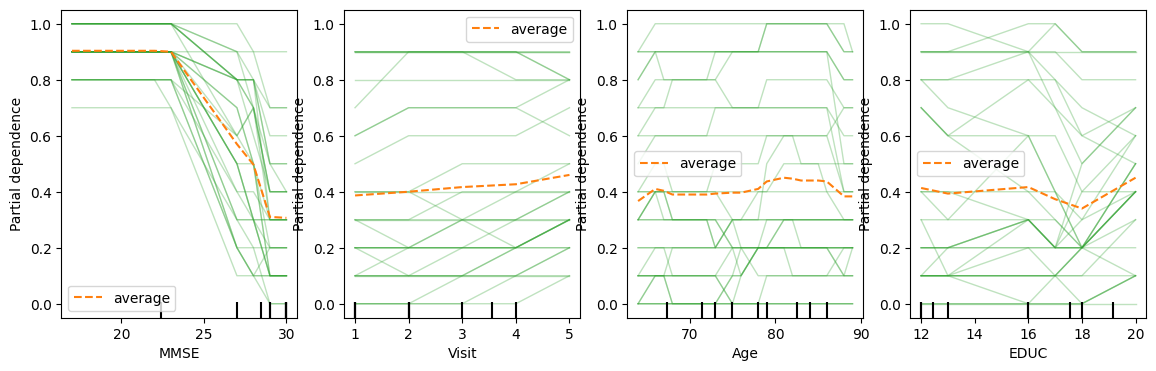

In [32]:
from sklearn.inspection import PartialDependenceDisplay
features = ['MMSE','Visit' , 'Age', 'EDUC']
fig, ax = plt.subplots(ncols=4, figsize=(14,4))
display = PartialDependenceDisplay.from_estimator(rf_model, X_test.iloc[:30,:],
                                                  features, kind = 'both', random_state=0,
                                                  ice_lines_kw = {'color':'tab:green', 'linewidth':1},
                                                  pd_line_kw = {'color':'tab:orange', 'linestyle':'--'}, ax = ax)




In [34]:
from sklearn.datasets import make_moons, make_blobs
from sklearn.covariance import EllipticEnvelope
from sklearn.ensemble import IsolationForest
from sklearn.neighbors import LocalOutlierFactor

In [33]:
X

,Visit,Age,EDUC,SES,MMSE,eTIV,nWBV,ASF,GENDER
0,1,87,14,2.0,27.0,1987,0.696,0.883,0
1,2,88,14,2.0,30.0,2004,0.681,0.876,0
2,1,88,18,3.0,28.0,1215,0.710,1.444,1
3,2,90,18,3.0,27.0,1200,0.718,1.462,1
4,1,80,12,4.0,28.0,1689,0.712,1.039,0
...,...,...,...,...,...,...,...,...,...
349,2,82,16,1.0,28.0,1693,0.694,1.037,0
350,3,86,16,1.0,26.0,1688,0.675,1.040,0
351,1,61,13,2.0,30.0,1319,0.801,1.331,1
352,2,63,13,2.0,30.0,1327,0.796,1.323,1


In [36]:
X = df[['Age','eTIV']]
X

,Age,eTIV
0,87,1987
1,88,2004
2,88,1215
3,90,1200
4,80,1689
...,...,...
349,82,1693
350,86,1688
351,61,1319
352,63,1327


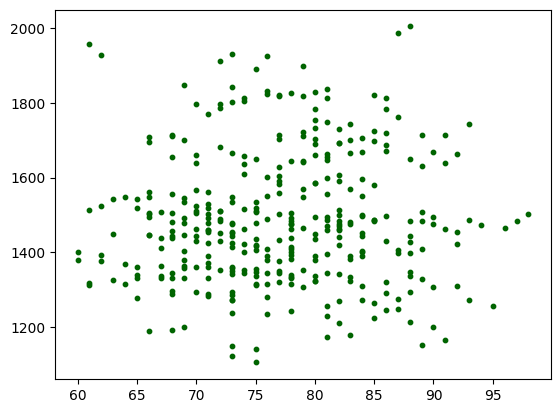

In [37]:
plt.scatter(X.values[:, 0], X.values[:, 1], marker="o", s=10, color='darkgreen')

In [38]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X_norm = scaler.fit_transform(X)

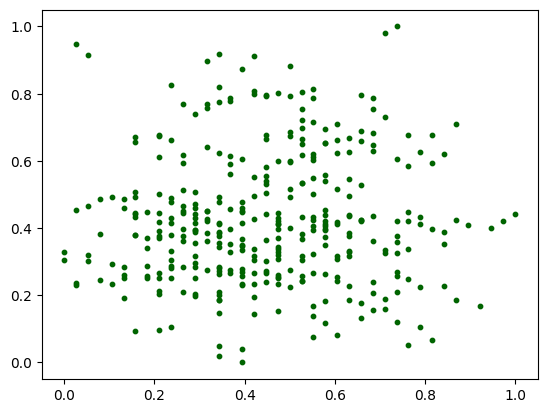

In [39]:
plt.scatter(X_norm[:, 0], X_norm[:, 1], marker="o", s=10, color='darkgreen')

In [40]:
from sklearn.covariance import EllipticEnvelope
elliptic_envelope_algorithm = EllipticEnvelope(contamination=0.05)

elliptic_envelope_algorithm.fit(X_norm)
elliptic_envelope_y_pred = elliptic_envelope_algorithm.predict(X_norm)

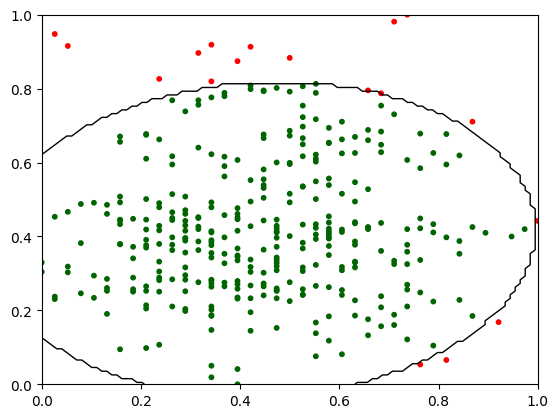

In [41]:
xx, yy = np.meshgrid(np.linspace(0, 1, 100), np.linspace(0, 1, 100))
Z = elliptic_envelope_algorithm.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)
colors = np.array(['red', 'darkgreen'])

plt.scatter(X_norm[:, 0], X_norm[:, 1], s=10, color=colors[(elliptic_envelope_y_pred + 1) // 2])
plt.contour(xx, yy, Z, levels=[0], linewidths=1, colors="black")

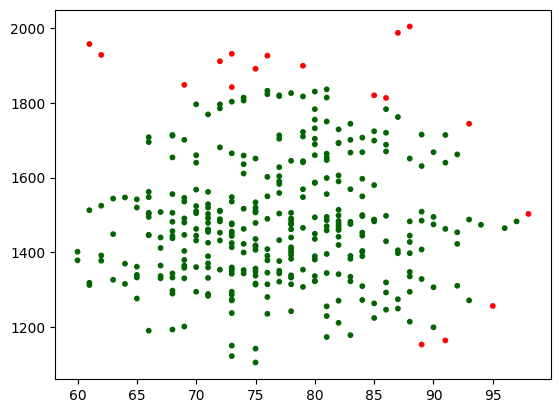

In [42]:
plt.scatter(X.values[:, 0], X.values[:, 1], s=10, color=colors[(elliptic_envelope_y_pred + 1) // 2])

In [43]:
xx_reshaped = xx.reshape(xx.shape[0]*xx.shape[1])
yy_reshaped = yy.reshape(yy.shape[0]*yy.shape[1])
points = np.c_[xx_reshaped, yy_reshaped]
print(points.shape)

(10000, 2)


In [44]:
points_inv_transformed = scaler.inverse_transform(points)

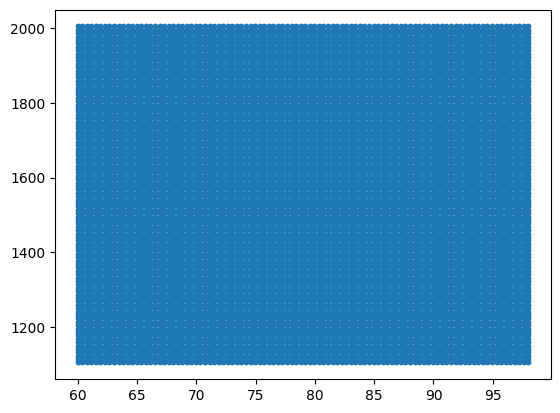

In [45]:
plt.scatter(points_inv_transformed[:, 0], points_inv_transformed[:, 1], s=10)

In [46]:
xx_inv_transformed = points_inv_transformed[:, 0]
xx_original_scale = xx_inv_transformed.reshape(xx.shape)
yy_inv_transformed = points_inv_transformed[:, 1]
yy_original_scale = yy_inv_transformed.reshape(yy.shape)

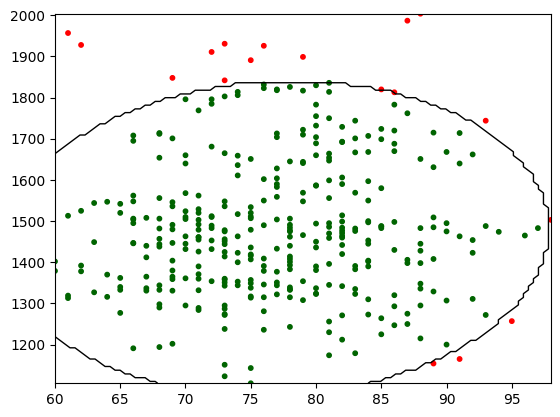

In [47]:
plt.scatter(X.values[:, 0], X.values[:, 1], s=10, color=colors[(elliptic_envelope_y_pred + 1) // 2])
plt.contour(xx_original_scale, yy_original_scale, Z, levels=[0], linewidths=1, colors="black")

In [49]:
from sklearn.neighbors import LocalOutlierFactor
lof_algorithm = LocalOutlierFactor(contamination=0.05, novelty=True)
lof_algorithm.fit(X_norm)

LocalOutlierFactor(contamination=0.05, novelty=True)

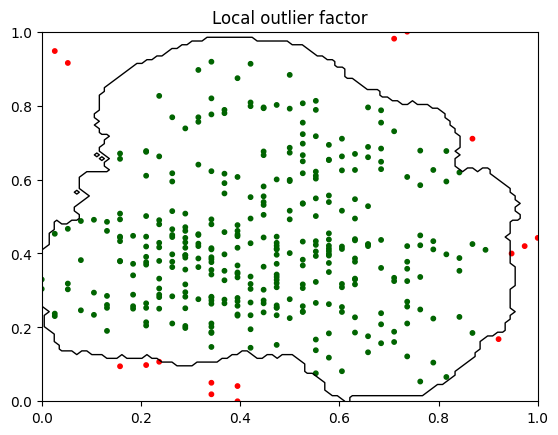

In [50]:
lof_y_pred = lof_algorithm.predict(X_norm)
colors = np.array(['red', 'darkgreen'])
plt.title('Local outlier factor')
plt.scatter(X_norm[:, 0], X_norm[:, 1], s=10, color=colors[(lof_y_pred + 1) // 2])

xx, yy = np.meshgrid(np.linspace(0, 1, 100),
                     np.linspace(0, 1, 100))
Z = lof_algorithm.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)
plt.contour(xx, yy, Z, levels=[0], linewidths=1, colors='black')

In [51]:
from sklearn.ensemble import IsolationForest

In [52]:
isolation_forest_algorithm = IsolationForest(n_estimators=135, contamination=0.05)
isolation_forest_algorithm.fit(X.values)
isolation_forest_y_pred = isolation_forest_algorithm.predict(X.values)

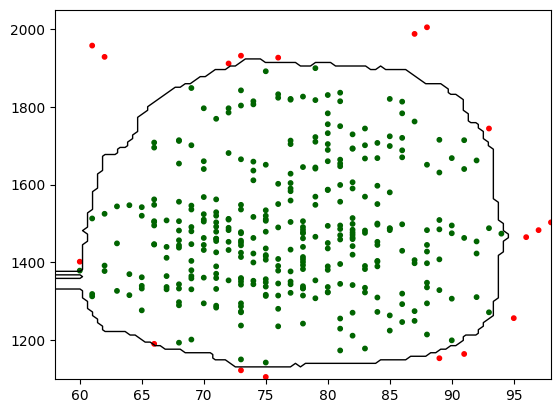

In [53]:
xx, yy = np.meshgrid(np.linspace(58, 98, 100), np.linspace(1100, 2000, 100))
Z = isolation_forest_algorithm.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)
colors = np.array(['red', 'darkgreen'])
plt.scatter(X.values[:, 0], X.values[:, 1], s=10, color=colors[(isolation_forest_y_pred + 1) // 2])
plt.contour(xx, yy, Z, levels=[0], linewidths=1, colors="black")
plt.show()